In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (mac용)
matplotlib.rc("axes", unicode_minus=False)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# elif platform.system() == 'Darwin':
#     plt.rcParams['font.family'] = 'AppleGothic'    # macOS
# else:
#     plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')



In [49]:
import pandas as pd

df_clean = pd.read_csv("./data/df_clean.csv") 
df_clean

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,PriceMin,PriceMax,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Hours
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,33160,37070,2022-01-07 06:24:00,2022,1,7,6,24,0,13.266667
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,3690,3970,2022-01-07 06:24:00,2022,1,7,6,24,0,13.266667
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,22150,23150,2022-01-07 06:24:00,2022,1,7,6,24,0,13.266667
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,20810,23030,2022-01-07 06:24:00,2022,1,7,6,24,0,13.266667
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,11640,13020,2022-01-14 06:28:00,2022,1,14,6,28,0,13.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856722,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,...,11100,11900,2024-12-27 04:23:00,2024,12,27,4,23,0,14.283333
856723,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,...,18820,20180,2024-12-27 04:23:00,2024,12,27,4,23,0,14.283333
856724,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,...,3080,3300,2024-12-27 04:23:00,2024,12,27,4,23,0,14.283333
856725,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,...,35420,37980,2024-12-27 04:23:00,2024,12,27,4,23,0,14.283333


In [3]:
# 컬럼 목록 출력
print("📋 현재 포함된 컬럼 목록:")
for col in df_clean.columns:
    print(f"- {col}")

📋 현재 포함된 컬럼 목록:
- idUser
- Gender
- Age
- AgeGroup
- FamilyCount
- MemberYN
- idOrder
- OrderDT
- OrderMonth
- OrderDay
- OrderHour
- OrderMinute
- OrderSecond
- ItemCode
- ItemLargeName
- ItemMiddleName
- ItemSmallName
- ItemName
- Price
- PriceYear
- PriceMin
- PriceMax
- DeliveryDT
- Deli_Year
- Deli_Month
- Deli_Day
- Deli_Hour
- Deli_Minute
- Deli_Second
- Deli_Hours


In [20]:
# import pandas as pd

# # 데이터 불러오기
# df_clean = pd.read_csv('./data/df_clean.csv')

# # IsMorningDelivery, Deli_Duration 컬럼 드롭
# df_clean = df.drop(columns=['IsMorningDelivery', 'Deli_Duration'])

# # 변경된 데이터프레임 저장
# df_clean.to_csv('./data/df_clean.csv', index=False)

In [7]:
print(df_clean['Gender'].unique())

['여성' '남성']


In [21]:
# 컬럼 목록 출력
print("📋 현재 포함된 컬럼 목록:")
for col in df_clean.columns:
    print(f"- {col}")

📋 현재 포함된 컬럼 목록:
- idUser
- Gender
- Age
- AgeGroup
- FamilyCount
- MemberYN
- idOrder
- OrderDT
- OrderMonth
- OrderDay
- OrderHour
- OrderMinute
- OrderSecond
- ItemCode
- ItemLargeName
- ItemMiddleName
- ItemSmallName
- ItemName
- Price
- PriceYear
- PriceMin
- PriceMax
- DeliveryDT
- Deli_Year
- Deli_Month
- Deli_Day
- Deli_Hour
- Deli_Minute
- Deli_Second
- Deli_Hours


In [9]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols

# 그래프 표시
%matplotlib inline

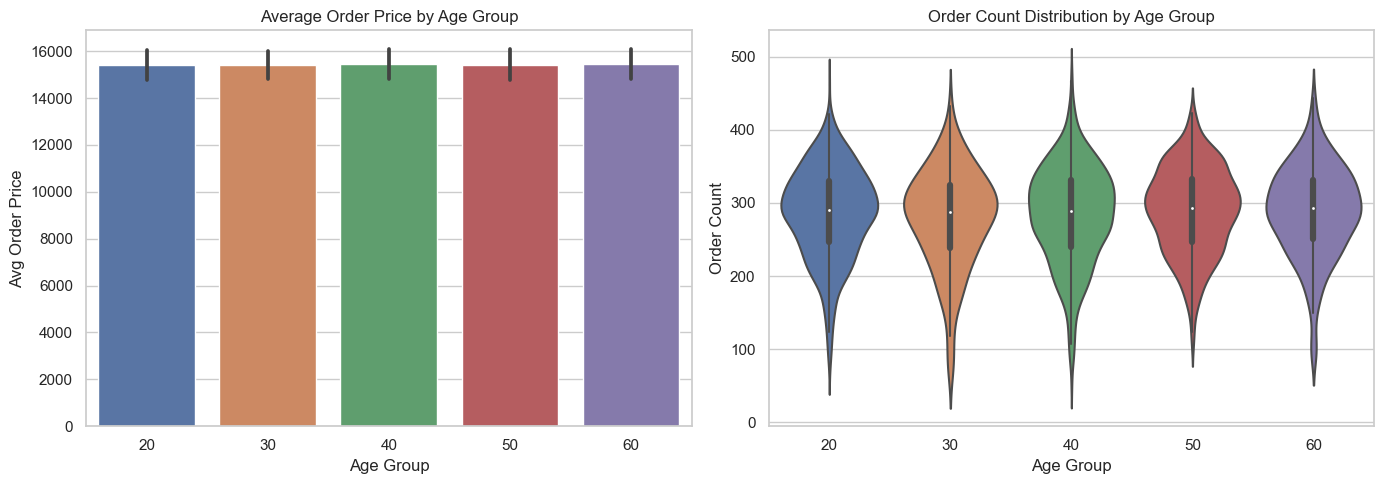

ValueError: min() arg is an empty sequence

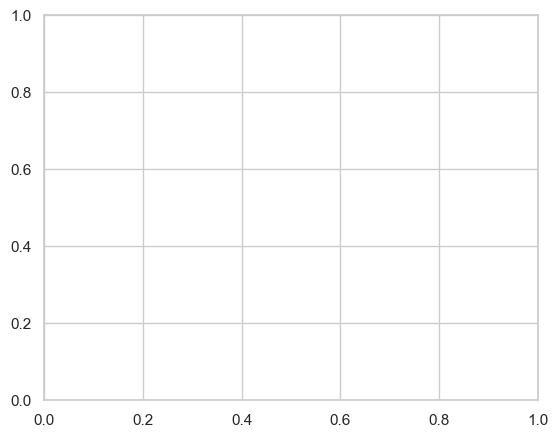

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# ✅ Gender 한글 → 영어
df_clean['Gender'] = df_clean['Gender'].map({'남성': 'Male', '여성': 'Female'})

# ✅ AgeGroup 그래프 레이블만 영어 숫자로 표시하고 싶을 경우, 그래프 안에서 처리
# 또는 아래처럼 데이터 자체를 바꿀 수도 있음
# df['AgeGroup'] = df['AgeGroup'].map({
#     '20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'
# })

# 주문 횟수 계산
df_clean['OrderCount'] = df_clean.groupby('idUser')['idOrder'].transform('count')

# 사용자별 통계 집계
user_stats = df_clean.groupby('idUser').agg({
    'Price': 'mean',
    'OrderCount': 'first',
    'Gender': 'first',
    'AgeGroup': 'first',
    'FamilyCount': 'first'
}).reset_index().rename(columns={'Price': 'AvgOrderPrice'})

### 1. Age Group
plt.figure(figsize=(14, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=user_stats, x='AgeGroup', y='AvgOrderPrice', ci='sd')
plt.title('Average Order Price by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Order Price')
plt.gca().set_xticklabels(['20', '30', '40', '50', '60'])  # x축 레이블만 수정

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=user_stats, x='AgeGroup', y='OrderCount')
plt.title('Order Count Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Count')
plt.gca().set_xticklabels(['20', '30', '40', '50', '60'])

plt.tight_layout()
plt.show()

### 2. Gender
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=user_stats, x='Gender', y='AvgOrderPrice', ci='sd')
plt.title('Average Order Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Order Price')

plt.subplot(1, 2, 2)
sns.violinplot(data=user_stats, x='Gender', y='OrderCount')
plt.title('Order Count Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Order Count')

plt.tight_layout()
plt.show()

### 3. Family Count
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=user_stats, x='FamilyCount', y='AvgOrderPrice', ci='sd')
plt.title('Average Order Price by Family Count')
plt.xlabel('Family Count')
plt.ylabel('Avg Order Price')

plt.subplot(1, 2, 2)
sns.violinplot(data=user_stats, x='FamilyCount', y='OrderCount')
plt.title('Order Count Distribution by Family Count')
plt.xlabel('Family Count')
plt.ylabel('Order Count')

plt.tight_layout()
plt.show()


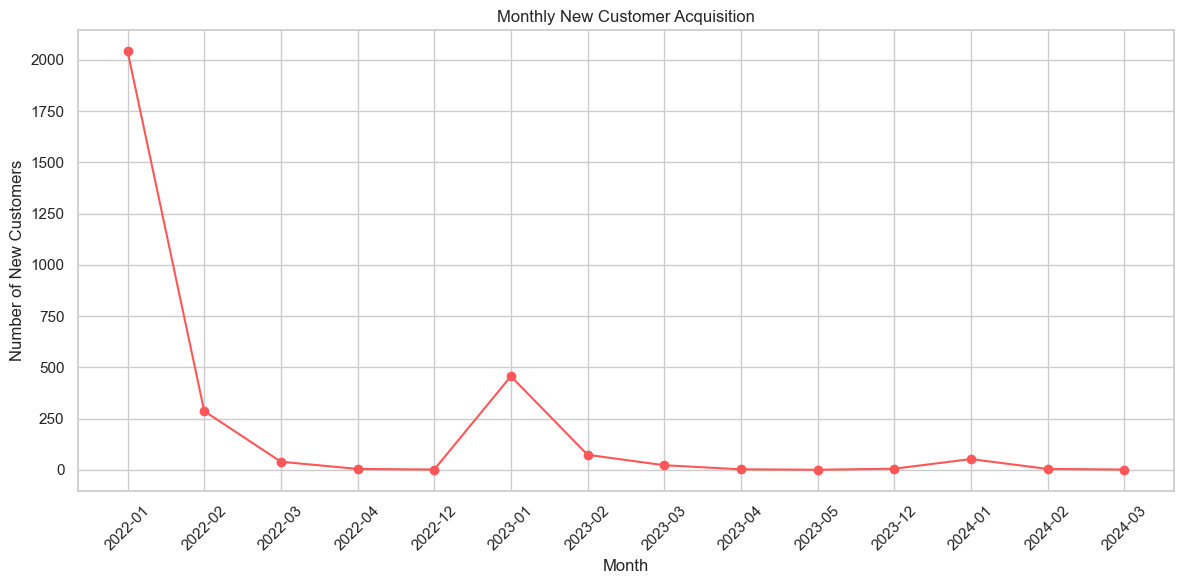

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 주문일시 컬럼을 datetime으로 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])

# 2. 고객별 첫 주문일 구하기
first_orders = df_clean.groupby('idUser')['OrderDT'].min().reset_index()
first_orders.columns = ['idUser', 'FirstOrderDate']

# 3. 첫 주문일 기준으로 월 단위 집계
first_orders['FirstOrderMonth'] = first_orders['FirstOrderDate'].dt.to_period('M').astype(str)

# 4. 월별 신규 고객 수 집계
monthly_new_customers = first_orders.groupby('FirstOrderMonth')['idUser'].count().reset_index()
monthly_new_customers.columns = ['Month', 'NewCustomers']

# 5. 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_new_customers['Month'], monthly_new_customers['NewCustomers'], marker='o', color='#ff5757')
plt.xticks(rotation=45)
plt.title('Monthly New Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


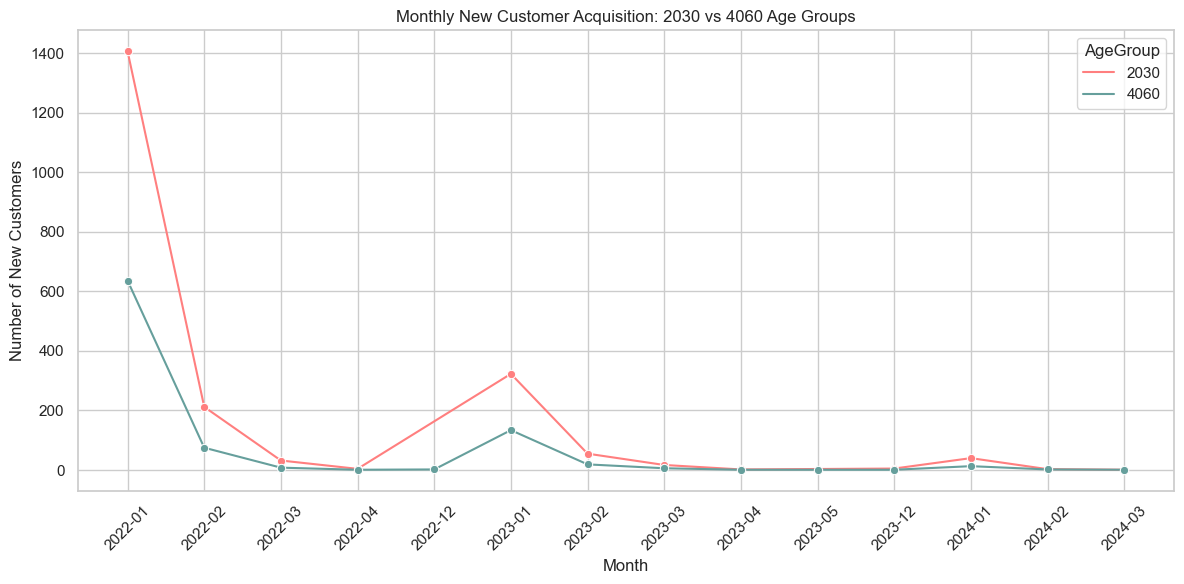

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 주문일시 datetime 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])

# 고객별 첫 주문일 + 연령대
first_orders = df_clean.groupby('idUser').agg({
    'OrderDT': 'min',
    'AgeGroup': 'first'
}).reset_index()
first_orders.columns = ['idUser', 'FirstOrderDate', 'AgeGroup']

# 한글 → 숫자 문자열로 변환
age_map = {'20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
first_orders['AgeGroup'] = first_orders['AgeGroup'].map(age_map)

# ✅ 연령대 그룹화
def age_grouping(age):
    if age in ['20', '30']:
        return '2030'
    elif age in ['40', '50', '60']:
        return '4060'
    else:
        return '기타'  # 혹시 모를 이상치 대비

first_orders['AgeGroupGrouped'] = first_orders['AgeGroup'].apply(age_grouping)

# 월 컬럼 생성
first_orders['FirstOrderMonth'] = first_orders['FirstOrderDate'].dt.to_period('M').astype(str)

# 월별 + 연령대그룹별 유입 고객 수 집계
monthly_grouped = first_orders.groupby(['FirstOrderMonth', 'AgeGroupGrouped'])['idUser'].count().reset_index()
monthly_grouped.columns = ['Month', 'AgeGroup', 'NewCustomers']
monthly_grouped = monthly_grouped[monthly_grouped['AgeGroup'].isin(['2030', '4060'])]  # 기타 제외

# ✅ 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_grouped, x='Month', y='NewCustomers', hue='AgeGroup',
             palette={'2030': '#ff7f7f', '4060': '#669f9c'}, marker='o')

plt.title('Monthly New Customer Acquisition: 2030 vs 4060 Age Groups')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
# 연도순 + 그룹순 정렬된 수치 출력
print("📊 월별 신규 고객 수 (2030 vs 4060)")
print(monthly_grouped.sort_values(['Month', 'AgeGroup']))


📊 월별 신규 고객 수 (2030 vs 4060)
      Month AgeGroup  NewCustomers
0   2022-01     2030          1406
1   2022-01     4060           636
2   2022-02     2030           212
3   2022-02     4060            75
4   2022-03     2030            32
5   2022-03     4060             8
6   2022-04     2030             4
7   2022-04     4060             1
8   2022-12     4060             2
9   2023-01     2030           323
10  2023-01     4060           134
11  2023-02     2030            55
12  2023-02     4060            19
13  2023-03     2030            17
14  2023-03     4060             6
15  2023-04     2030             2
16  2023-04     4060             1
17  2023-05     4060             1
18  2023-12     2030             5
19  2023-12     4060             1
20  2024-01     2030            40
21  2024-01     4060            13
22  2024-02     2030             3
23  2024-02     4060             2
24  2024-03     2030             1
25  2024-03     4060             1


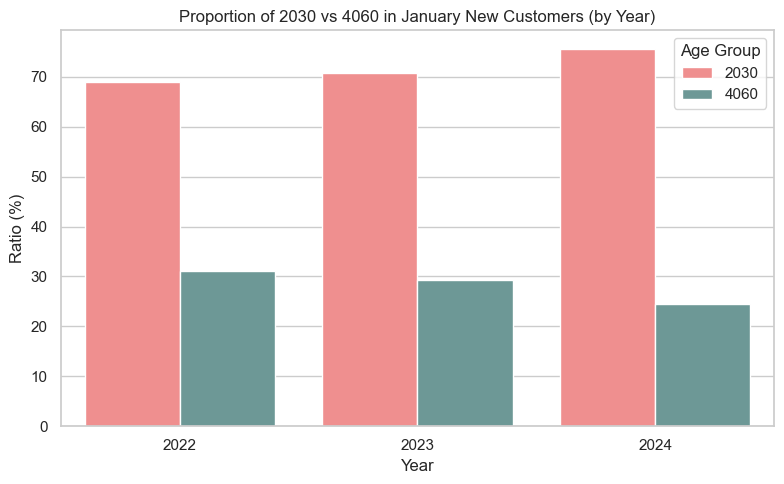

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 주문일시 datetime 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])

# 2. 고객별 첫 주문일 & 연령대
first_orders = df_clean.groupby('idUser').agg({
    'OrderDT': 'min',
    'AgeGroup': 'first'
}).reset_index()
first_orders.columns = ['idUser', 'FirstOrderDate', 'AgeGroup']

# 3. AgeGroup 숫자화
age_map = {'20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
first_orders['AgeGroup'] = first_orders['AgeGroup'].map(age_map)

# 4. 2030 / 4060 그룹화
def age_grouping(age):
    if age in ['20', '30']:
        return '2030'
    elif age in ['40', '50', '60']:
        return '4060'
    else:
        return None

first_orders['AgeGroupGrouped'] = first_orders['AgeGroup'].apply(age_grouping)

# 5. 연도와 월 추출
first_orders['Year'] = first_orders['FirstOrderDate'].dt.year
first_orders['Month'] = first_orders['FirstOrderDate'].dt.month

# 6. 1월 데이터만 필터링
jan_data = first_orders[first_orders['Month'] == 1].dropna(subset=['AgeGroupGrouped'])

# 7. 연도별 1월 유입 비중 계산
jan_counts = jan_data.groupby(['Year', 'AgeGroupGrouped'])['idUser'].count().reset_index()
jan_total = jan_counts.groupby('Year')['idUser'].transform('sum')
jan_counts['Ratio'] = (jan_counts['idUser'] / jan_total * 100).round(1)

# 8. 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=jan_counts, x='Year', y='Ratio', hue='AgeGroupGrouped',
            palette={'2030': '#ff7f7f', '4060': '#669f9c'})

plt.title('Proportion of 2030 vs 4060 in January New Customers (by Year)')
plt.xlabel('Year')
plt.ylabel('Ratio (%)')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


In [25]:
jan_counts

,Year,AgeGroupGrouped,idUser,Ratio
0,2022,2030,1406,68.9
1,2022,4060,636,31.1
2,2023,2030,323,70.7
3,2023,4060,134,29.3
4,2024,2030,40,75.5
5,2024,4060,13,24.5


In [34]:
import pandas as pd

# 1. 주문일시 datetime 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])

# 2. 고객별 첫 주문일 추출
first_orders = df_clean.groupby('idUser')['OrderDT'].min().reset_index()
first_orders.columns = ['idUser', 'FirstOrderDate']

# 3. 월별 변환
first_orders['FirstOrderMonth'] = first_orders['FirstOrderDate'].dt.to_period('M').astype(str)

# 4. 월별 신규 고객 수 집계
monthly_new_customers = first_orders.groupby('FirstOrderMonth')['idUser'].count().reset_index()
monthly_new_customers.columns = ['Month', 'NewCustomers']

# 5. 결과 수치 출력
print("📊 월별 신규 고객 유입 수")
print(monthly_new_customers)


📊 월별 신규 고객 유입 수
      Month  NewCustomers
0   2022-01          2042
1   2022-02           287
2   2022-03            40
3   2022-04             5
4   2022-12             2
5   2023-01           457
6   2023-02            74
7   2023-03            23
8   2023-04             3
9   2023-05             1
10  2023-12             6
11  2024-01            53
12  2024-02             5
13  2024-03             2


In [36]:
import pandas as pd

# 1. 고객 ID와 연령대만 추출 후 중복 제거
user_age = df_clean[['idUser', 'AgeGroup']].drop_duplicates()

# 2. AgeGroup 문자열을 숫자 형식으로 변환 (예: '20대' → '20')
age_map = {'10대': '10', '20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
user_age['AgeGroup'] = user_age['AgeGroup'].map(age_map)

# 3. 집계
age_dist = user_age.groupby('AgeGroup')['idUser'].count().reset_index()
age_dist.columns = ['AgeGroup', 'UserCount']

# 4. 숫자순 정렬
age_dist['AgeGroup'] = age_dist['AgeGroup'].astype(int)
age_dist = age_dist.sort_values('AgeGroup')

# 5. 출력
print("📊 고객 연령대별 분포 (숫자 형식)")
print(age_dist)


📊 고객 연령대별 분포 (숫자 형식)
   AgeGroup  UserCount
0        20        820
1        30       1280
2        40        477
3        50        291
4        60        132


In [38]:
age_dist

,AgeGroup,UserCount
0,20,820
1,30,1280
2,40,477
3,50,291
4,60,132


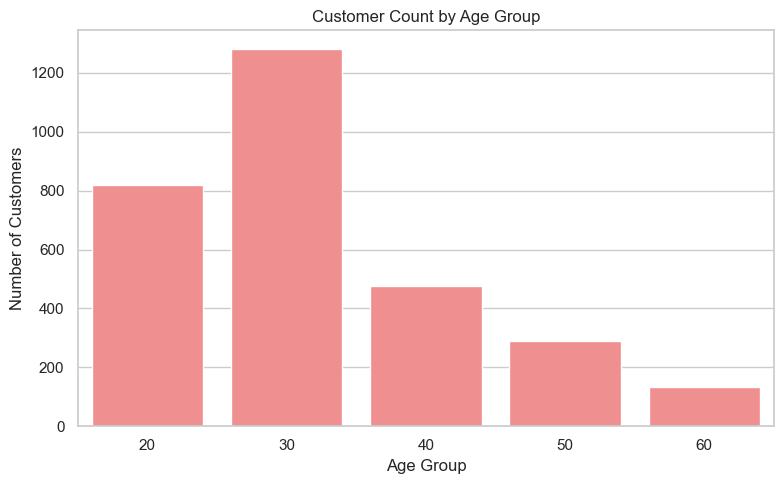

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=age_dist, x='AgeGroup', y='UserCount', color='#ff7f7f')
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# 1. 고객 ID와 성별만 추출 후 중복 제거
user_gender = df_clean[['idUser', 'Gender']].drop_duplicates()

# 2. 성별별 고객 수 집계
gender_dist = user_gender.groupby('Gender')['idUser'].count().reset_index()
gender_dist.columns = ['Gender', 'UserCount']

# 3. 출력
print("📊 성별 고객 분포")
print(gender_dist)


📊 성별 고객 분포
  Gender  UserCount
0     남성       1190
1     여성       1810


In [45]:
print(df_clean['Gender'].unique())

[nan]


In [13]:
gender_dist

,Gender,UserCount
0,남성,1190
1,여성,1810


In [17]:
# 공백 제거 + 영어 변환
df_clean['Gender'] = df_clean['Gender'].astype(str).str.strip()
df_clean['Gender'] = df_clean['Gender'].map({'남성': 'Male', '여성': 'Female'})

# NaN 제거 후 중복 제거
user_gender = df_clean[['idUser', 'Gender']].drop_duplicates()
user_gender = user_gender.dropna(subset=['Gender'])

# 성별별 고객 수 집계
gender_dist = user_gender.groupby('Gender')['idUser'].count().reset_index()
gender_dist.columns = ['Gender', 'UserCount']


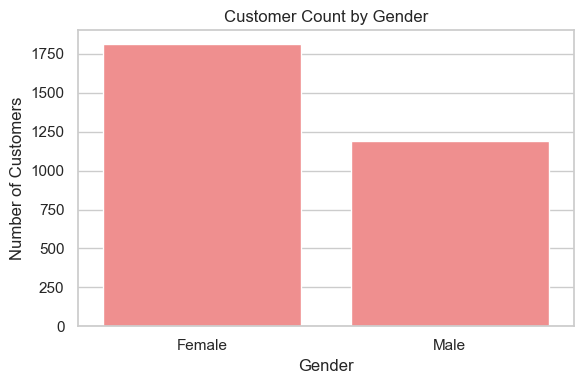

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_dist, x='Gender', y='UserCount', color='#ff7f7f')
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# 중복 제거: 고객당 한 번만 카운트
user_family = df_clean[['idUser', 'FamilyCount']].drop_duplicates()

# 가구원 수별 고객 수 집계
family_dist = user_family.groupby('FamilyCount')['idUser'].count().reset_index()
family_dist.columns = ['FamilyCount', 'UserCount']

# 정렬
family_dist = family_dist.sort_values('FamilyCount')

# 결과 출력
print("📊 가구원 수에 따른 고객 분포")
print(family_dist)


📊 가구원 수에 따른 고객 분포
   FamilyCount  UserCount
0            0        464
1            1        803
2            2       1134
3            3        599


In [37]:
family_dist

,FamilyCount,UserCount
0,0,464
1,1,803
2,2,1134
3,3,599


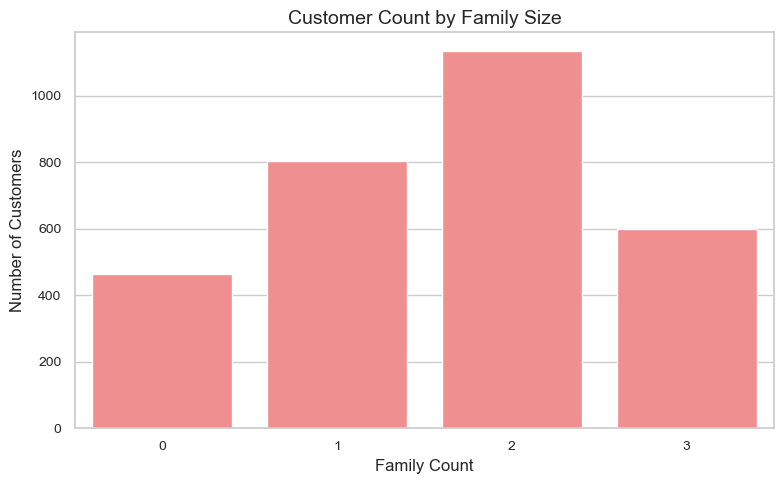

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.barplot(data=family_dist, x='FamilyCount', y='UserCount', color='#ff7f7f')

plt.title('Customer Count by Family Size', fontsize=14)
plt.xlabel('Family Count', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


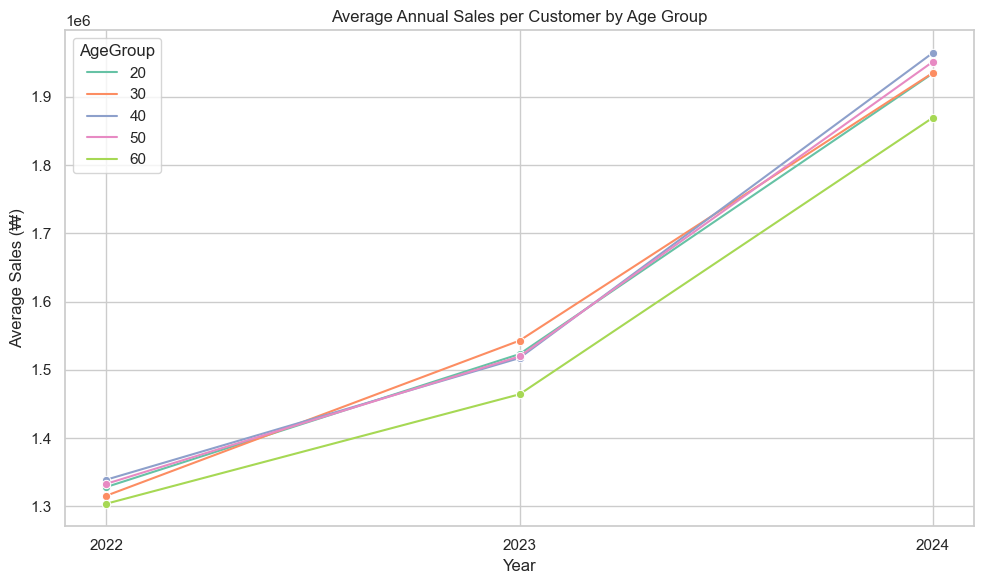

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 날짜 컬럼 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])
df_clean['Year'] = df_clean['OrderDT'].dt.year

# 2. AgeGroup 한글 → 숫자 문자열로 변환
age_map = {'10대': '10', '20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
df_clean['AgeGroup'] = df_clean['AgeGroup'].map(age_map)

# 3. 사용자-연도 단위 평균 매출 계산
user_year_sales = df_clean.groupby(['idUser', 'AgeGroup', 'Year'])['Price'].sum().reset_index()

# 4. 연령대 + 연도별 평균 매출 집계
age_year_sales = user_year_sales.groupby(['AgeGroup', 'Year'])['Price'].mean().reset_index()
age_year_sales.columns = ['AgeGroup', 'Year', 'AvgSales']

# 5. 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_year_sales, x='Year', y='AvgSales', hue='AgeGroup', palette='Set2', marker='o')

plt.title('Average Annual Sales per Customer by Age Group')
plt.xlabel('Year')
plt.ylabel('Average Sales (₩)')
plt.xticks(age_year_sales['Year'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()


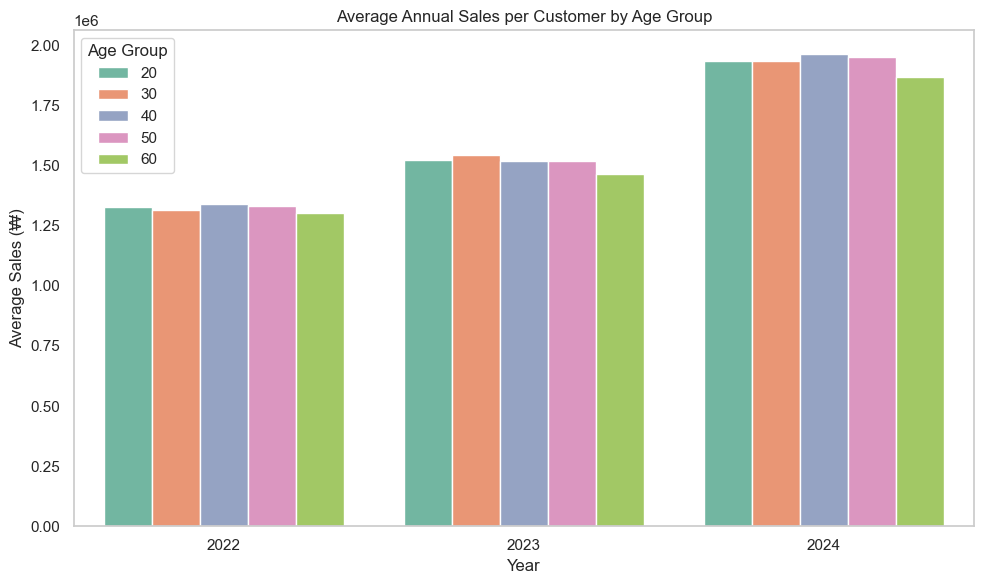

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 날짜 컬럼 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])
df_clean['Year'] = df_clean['OrderDT'].dt.year

# 2. 연령대 한글 → 숫자 문자열로 변환
age_map = {'10대': '10', '20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
df_clean['AgeGroup'] = df_clean['AgeGroup'].map(age_map)

# 3. 고객-연도 단위 매출 계산
user_year_sales = df_clean.groupby(['idUser', 'AgeGroup', 'Year'])['Price'].sum().reset_index()

# 4. 연령대-연도별 평균 매출 집계
age_year_sales = user_year_sales.groupby(['AgeGroup', 'Year'])['Price'].mean().reset_index()
age_year_sales.columns = ['AgeGroup', 'Year', 'AvgSales']

# 5. 시각화: 그룹형 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=age_year_sales, x='Year', y='AvgSales', hue='AgeGroup', palette='Set2')

plt.title('Average Annual Sales per Customer by Age Group')
plt.xlabel('Year')
plt.ylabel('Average Sales (₩)')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [57]:
age_year_sales

,AgeGroup,Year,AvgSales
0,20,2022,1.328457e+06
1,20,2023,1.523193e+06
2,20,2024,1.934368e+06
3,30,2022,1.315747e+06
4,30,2023,1.542899e+06
5,30,2024,1.935119e+06
6,40,2022,1.339184e+06
7,40,2023,1.517396e+06
8,40,2024,1.964408e+06
9,50,2022,1.333152e+06


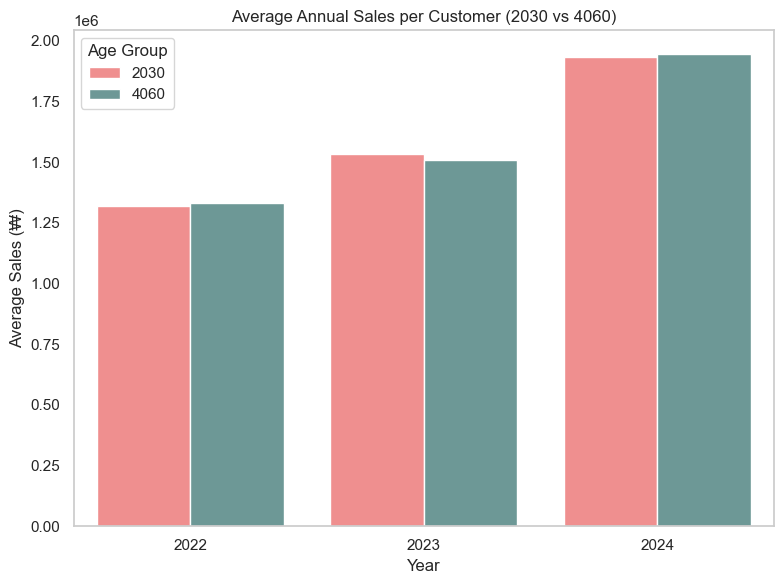

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 날짜 변환
df_clean['OrderDT'] = pd.to_datetime(df_clean['OrderDT'])
df_clean['Year'] = df_clean['OrderDT'].dt.year

# 2. AgeGroup 한글 → 숫자 문자열
age_map = {'10대': '10', '20대': '20', '30대': '30', '40대': '40', '50대': '50', '60대': '60'}
df_clean['AgeGroup'] = df_clean['AgeGroup'].map(age_map)

# 3. AgeGroup을 2030 / 4060 그룹으로 변환
def group_age(age):
    if age in ['20', '30']:
        return '2030'
    elif age in ['40', '50', '60']:
        return '4060'
    else:
        return None

df_clean['AgeGroupGrouped'] = df_clean['AgeGroup'].apply(group_age)

# 4. 고객-연도 단위 매출 계산
user_sales = df_clean.groupby(['idUser', 'AgeGroupGrouped', 'Year'])['Price'].sum().reset_index()

# 5. 그룹별 연도별 평균 매출 계산
grouped_sales = user_sales.groupby(['AgeGroupGrouped', 'Year'])['Price'].mean().reset_index()
grouped_sales.columns = ['AgeGroup', 'Year', 'AvgSales']

# 6. 시각화 (그룹형 막대그래프)
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_sales, x='Year', y='AvgSales', hue='AgeGroup',
            palette={'2030': '#ff7f7f', '4060': '#669f9c'})

plt.title('Average Annual Sales per Customer (2030 vs 4060)')
plt.xlabel('Year')
plt.ylabel('Average Sales (₩)')
plt.legend(title='Age Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd

# 1. 고객 단위 연도별 매출 집계 (기존과 동일)
user_sales = df_clean.groupby(['idUser', 'AgeGroupGrouped', 'Year'])['Price'].sum().reset_index()

# 2. 그룹별 연도별 평균 매출 계산
grouped_sales = user_sales.groupby(['AgeGroupGrouped', 'Year'])['Price'].mean().reset_index()
grouped_sales.columns = ['AgeGroup', 'Year', 'AvgSales']

# 3. 결과 출력
print("📊 연령대 그룹별 연도별 평균 매출")
print(grouped_sales)


📊 연령대 그룹별 연도별 평균 매출
  AgeGroup  Year      AvgSales
0     2030  2022  1.320765e+06
1     2030  2023  1.535165e+06
2     2030  2024  1.934826e+06
3     4060  2022  1.331955e+06
4     4060  2023  1.510500e+06
5     4060  2024  1.946259e+06


In [55]:
grouped_sales

,AgeGroup,Year,AvgSales
0,2030,2022,1.320765e+06
1,2030,2023,1.535165e+06
2,2030,2024,1.934826e+06
3,4060,2022,1.331955e+06
4,4060,2023,1.510500e+06
5,4060,2024,1.946259e+06


In [59]:
import pandas as pd

# 1. 성별 한글 → 영어 (혹시 안 되어 있으면)
df_clean['Gender'] = df_clean['Gender'].map({'남성': 'Male', '여성': 'Female'})

# 2. 사용자 단위 평균 주문금액 계산
user_avg_price = df_clean.groupby('idUser').agg({
    'Price': 'mean',
    'Gender': 'first'
}).reset_index().rename(columns={'Price': 'AvgOrderPrice'})

# 3. 성별 평균 주문금액 집계
gender_avg_price = user_avg_price.groupby('Gender')['AvgOrderPrice'].mean().reset_index()

# 4. 결과 출력
print("📊 성별 평균 주문금액")
print(gender_avg_price)


📊 성별 평균 주문금액
   Gender  AvgOrderPrice
0  Female   15426.498751
1    Male   15436.089786


In [61]:
import pandas as pd

# 1. 고객 단위 평균 주문금액 계산
user_avg_price = df_clean.groupby('idUser').agg({
    'Price': 'mean',
    'FamilyCount': 'first'
}).reset_index().rename(columns={'Price': 'AvgOrderPrice'})

# 2. FamilyCount별 평균 주문금액 집계
family_avg_price = user_avg_price.groupby('FamilyCount')['AvgOrderPrice'].mean().reset_index()

# 3. 정렬 (가구원 수 순서대로)
family_avg_price = family_avg_price.sort_values('FamilyCount')

# 4. 결과 출력
print("📊 가구원 수별 평균 주문금액")
print(family_avg_price)


📊 가구원 수별 평균 주문금액
   FamilyCount  AvgOrderPrice
0            0   15433.343653
1            1   15446.670993
2            2   15438.049365
3            3   15391.341141
